In [1]:
import pandas as pd
from io import StringIO

# LaTeX table data
latex_table = """

Model,Accuracy,Balanced Accuracy,Macro F1-Score,Weighted F1-Score
CodeBERT-CE,0.2608,0.0476,0.0197,0.1079
GraphCodeBERT-CE,0.2608,0.0476,0.0197,0.1079
CodeBERT-FL,0.1580,0.1338,0.1131,0.1839
GraphCodeBERT-FL,0.1833,0.1636,0.1336,0.2053
hCodeBERT-default,0.2085,0.1110,0.1144,0.2086
hGraphCodeBERT-default,0.1891,0.0847,0.0959,0.2007
hCodeBERT-equalize,0.2002,0.1219,0.1176,0.1986
hGraphCodeBERT-equalize,0.1837,0.0850,0.0751,0.1805
hCodeBERT-descendants,0.2534,0.1505,0.1384,0.2354
hGraphCodeBERT-descendants,0.2086,0.1001,0.1033,0.2087
hCodeBERT-reachable_leaf_nodes,0.2214,0.1260,0.1245,0.2310
hGraphCodeBERT-reachable_leaf_nodes,0.2122,0.1214,0.1164,0.2084

"""

# Read the LaTeX table data into a DataFrame
df = pd.read_csv(StringIO(latex_table))
df.head()  # Display the first few rows of the DataFrame


,Model,Accuracy,Balanced Accuracy,Macro F1-Score,Weighted F1-Score
0,CodeBERT-CE,0.2608,0.0476,0.0197,0.1079
1,GraphCodeBERT-CE,0.2608,0.0476,0.0197,0.1079
2,CodeBERT-FL,0.1580,0.1338,0.1131,0.1839
3,GraphCodeBERT-FL,0.1833,0.1636,0.1336,0.2053
4,hCodeBERT-default,0.2085,0.1110,0.1144,0.2086


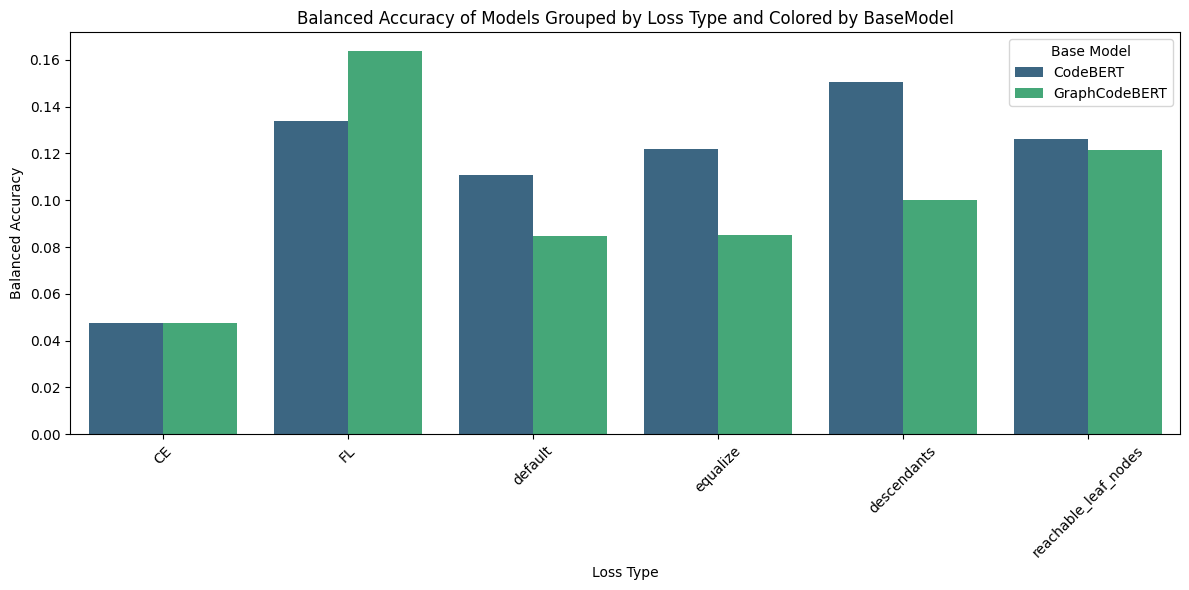

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting 'basemodel' and 'loss' from the 'Model' column
df['BaseModel'] = df['Model'].str.extract(r'h?(CodeBERT|GraphCodeBERT)')
df['Loss'] = df['Model'].str.extract(r'-(.*)')

# Creating a column plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Loss', y='Balanced Accuracy', hue='BaseModel', data=df, palette='viridis')
plt.title('Balanced Accuracy of Models Grouped by Loss Type and Colored by BaseModel')
plt.xlabel('Loss Type')
plt.ylabel('Balanced Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Base Model')
plt.tight_layout()

plt.show()


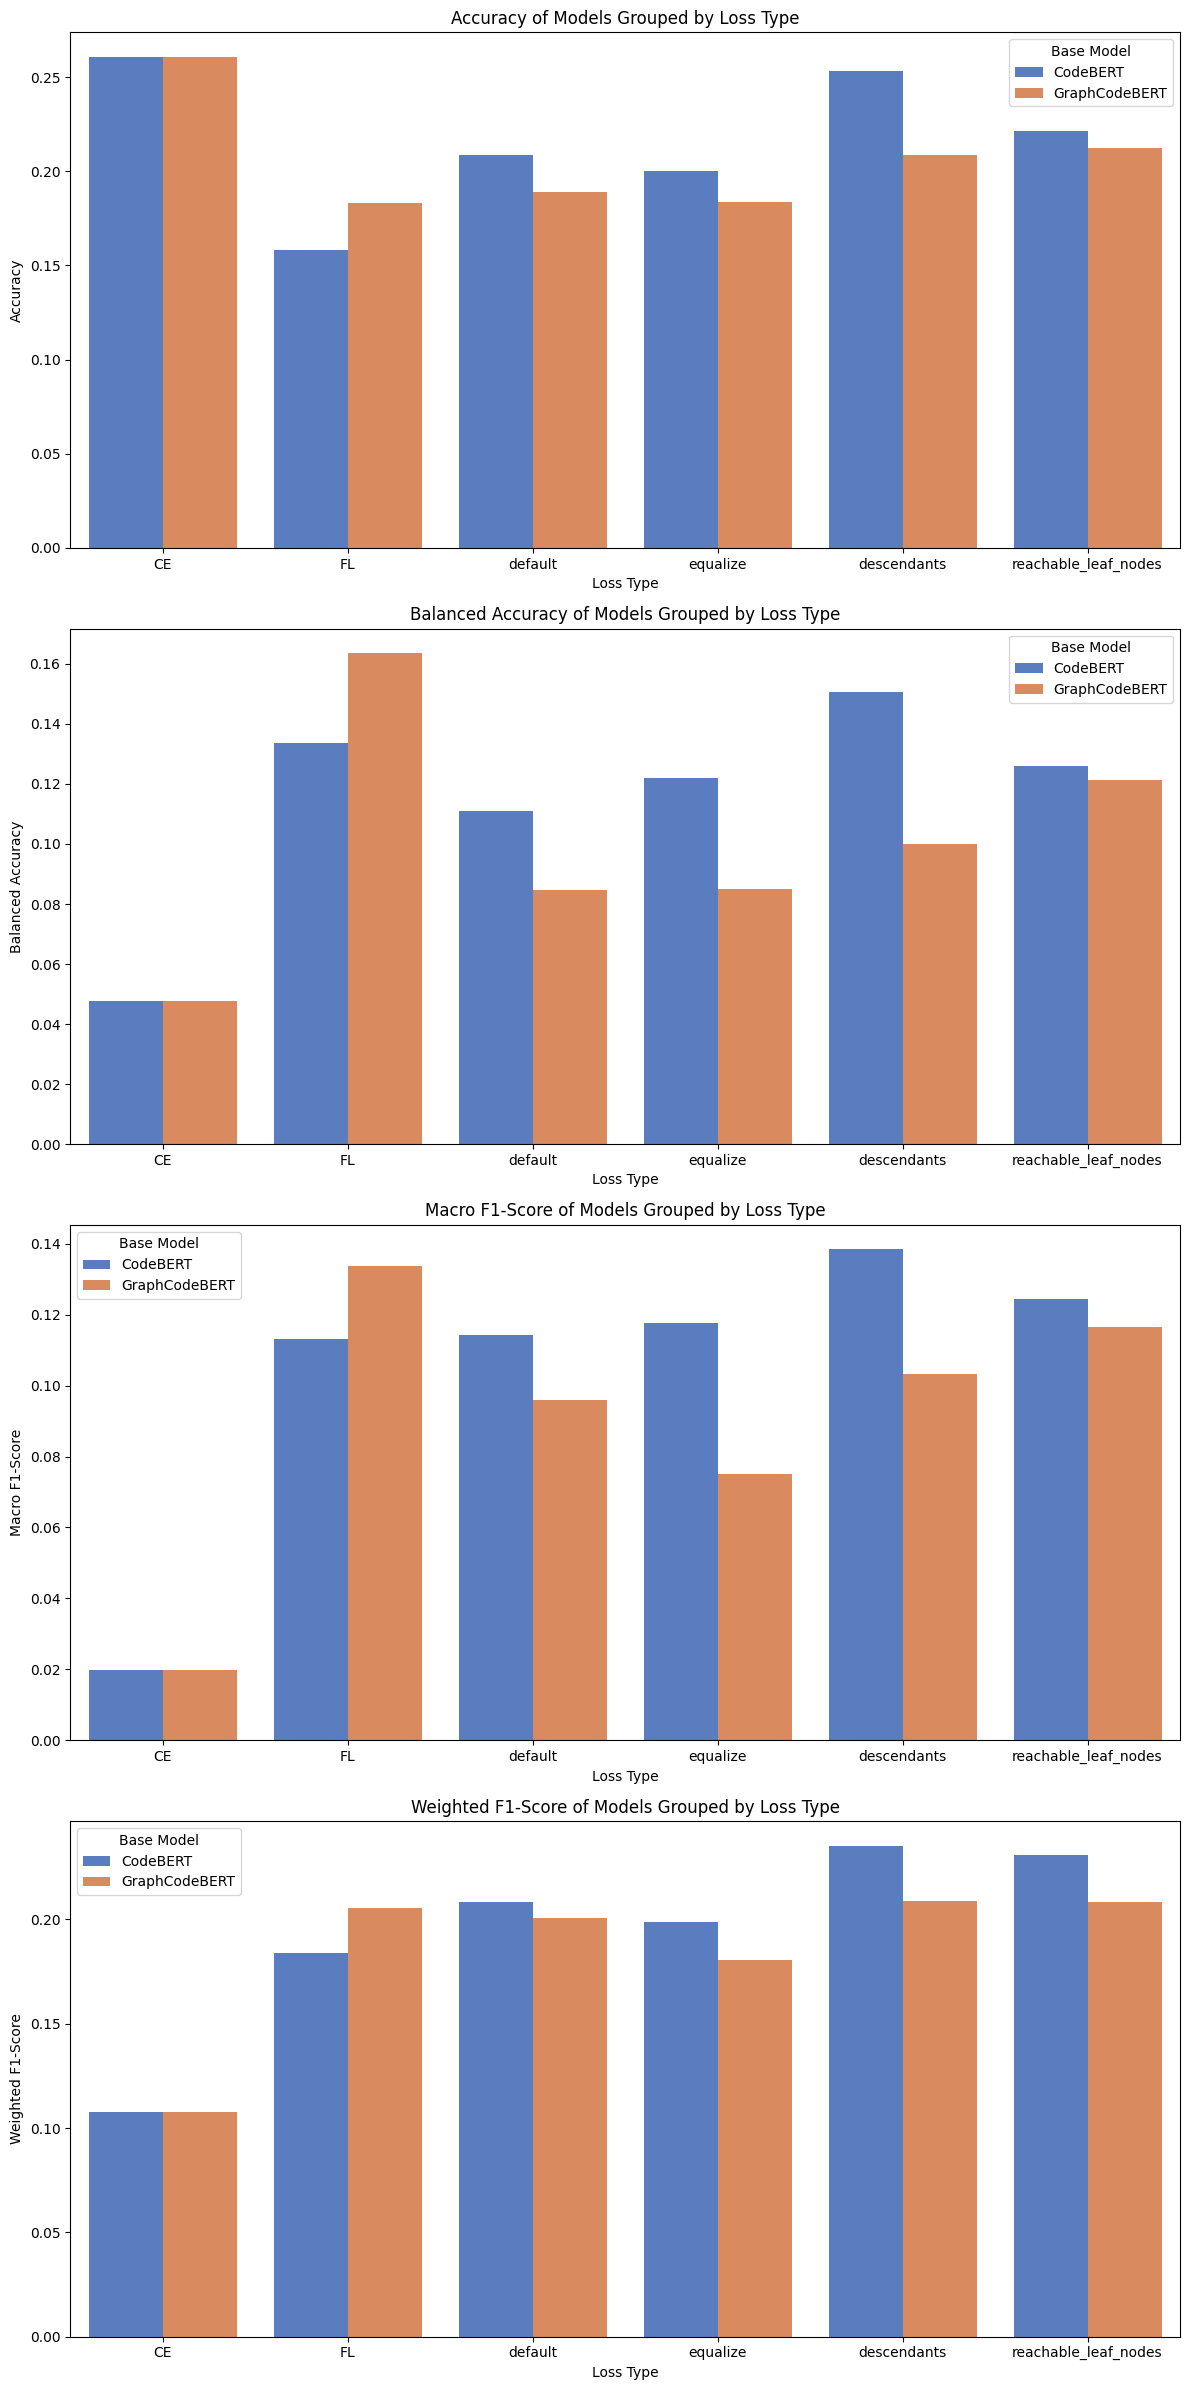

In [4]:
# Setting up the plot dimensions and layout
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))

# List of outcome measures
outcome_measures = ['Accuracy', 'Balanced Accuracy', 'Macro F1-Score', 'Weighted F1-Score']

# Plotting each outcome measure in a separate subplot
for i, measure in enumerate(outcome_measures):
    sns.barplot(ax=axes[i], x='Loss', y=measure, hue='BaseModel', data=df, palette='muted')
    axes[i].set_title(f'{measure} of Models Grouped by Loss Type')
    axes[i].set_xlabel('Loss Type')
    axes[i].set_ylabel(measure)
    axes[i].legend(title='Base Model')

plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Assuming 'df' is your DataFrame and 'outcome_measures' is already defined

# Define the size of the overall figure
fig, axes = plt.subplots(nrows=len(outcome_measures), ncols=1, figsize=(12, 6 * len(outcome_measures)))

# Check if 'axes' is an array, make it one if it's not
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])

# Plotting each outcome measure in a separate subplot within the figure
for i, measure in enumerate(outcome_measures):
    sns.barplot(ax=axes[i], x='Loss', y=measure, hue='BaseModel', data=df, palette='muted')
    axes[i].set_title(f'{measure} of Models Grouped by Loss Type')
    axes[i].set_xlabel('Loss Type')
    axes[i].set_ylabel(measure)
    axes[i].legend(title='Base Model')

plt.tight_layout()

# Define the filename for the combined plot
combined_plot_filename = "figures/multi_model_performance_plots.png"

# Save the entire figure as a single PNG file
plt.savefig(combined_plot_filename, bbox_inches='tight')
plt.close(fig)

# Return the filename for reference
combined_plot_filename


'figures/multi_model_performance_plots.png'

In [6]:
import pandas as pd
from io import StringIO

# LaTeX table data
latex_table = """

Model,Accuracy,Precision,Recall,F1-Score
CodeBERT-CE,0.2608,0.0000,0.0000,0.0000
GraphCodeBERT-CE,0.2608,0.0000,0.0000,0.0000
CodeBERT-FL,0.7336,0.7592,0.9367,0.8387
GraphCodeBERT-FL,0.7381,0.7654,0.9310,0.8401
hCodeBERT-default,0.6962,0.8000,0.7852,0.7926
hGraphCodeBERT-default,0.7174,0.7818,0.8568,0.8176
hCodeBERT-equalize,0.7039,0.7817,0.8317,0.8059
hGraphCodeBERT-equalize,0.6901,0.7811,0.8070,0.7938
hCodeBERT-descendants,0.7026,0.7993,0.7981,0.7987
hGraphCodeBERT-descendants,0.7016,0.7920,0.8087,0.8003
hCodeBERT-reachable_leaf_nodes,0.7379,0.8043,0.8530,0.8279
hGraphCodeBERT-reachable_leaf_nodes,0.6914,0.7922,0.7896,0.7909
"""

# Read the LaTeX table data into a DataFrame
df = pd.read_csv(StringIO(latex_table))
df.head()  # Display the first few rows of the DataFrame


,Model,Accuracy,Precision,Recall,F1-Score
0,CodeBERT-CE,0.2608,0.0000,0.0000,0.0000
1,GraphCodeBERT-CE,0.2608,0.0000,0.0000,0.0000
2,CodeBERT-FL,0.7336,0.7592,0.9367,0.8387
3,GraphCodeBERT-FL,0.7381,0.7654,0.9310,0.8401
4,hCodeBERT-default,0.6962,0.8000,0.7852,0.7926


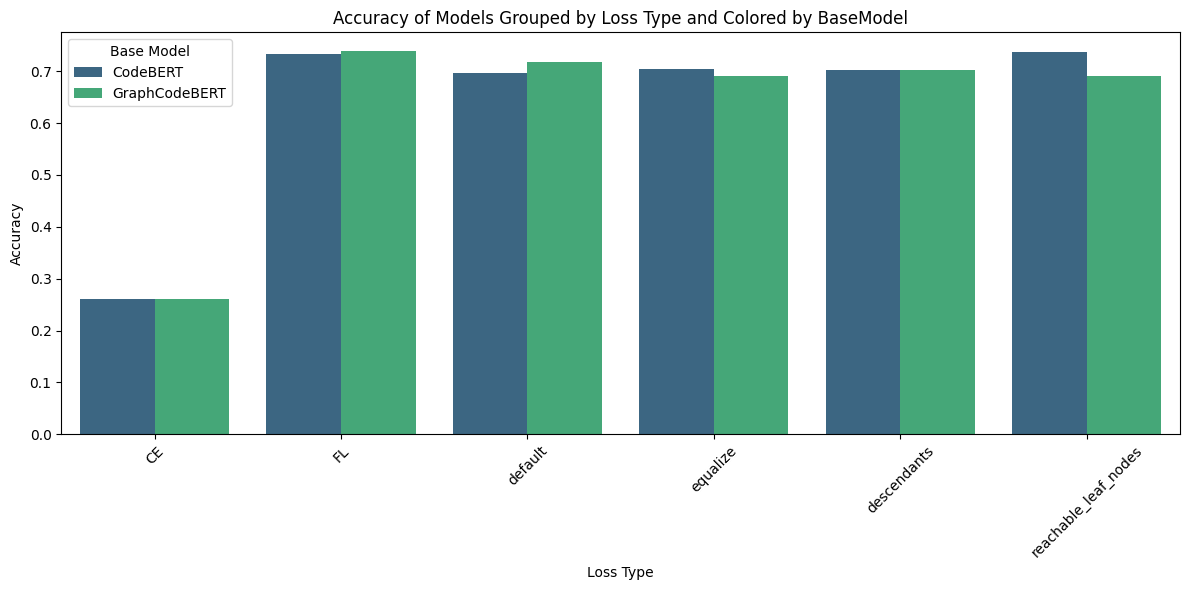

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting 'basemodel' and 'loss' from the 'Model' column
df['BaseModel'] = df['Model'].str.extract(r'h?(CodeBERT|GraphCodeBERT)')
df['Loss'] = df['Model'].str.extract(r'-(.*)')

# Creating a column plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Loss', y='Accuracy', hue='BaseModel', data=df, palette='viridis')
plt.title('Accuracy of Models Grouped by Loss Type and Colored by BaseModel')
plt.xlabel('Loss Type')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Base Model')
plt.tight_layout()

plt.show()


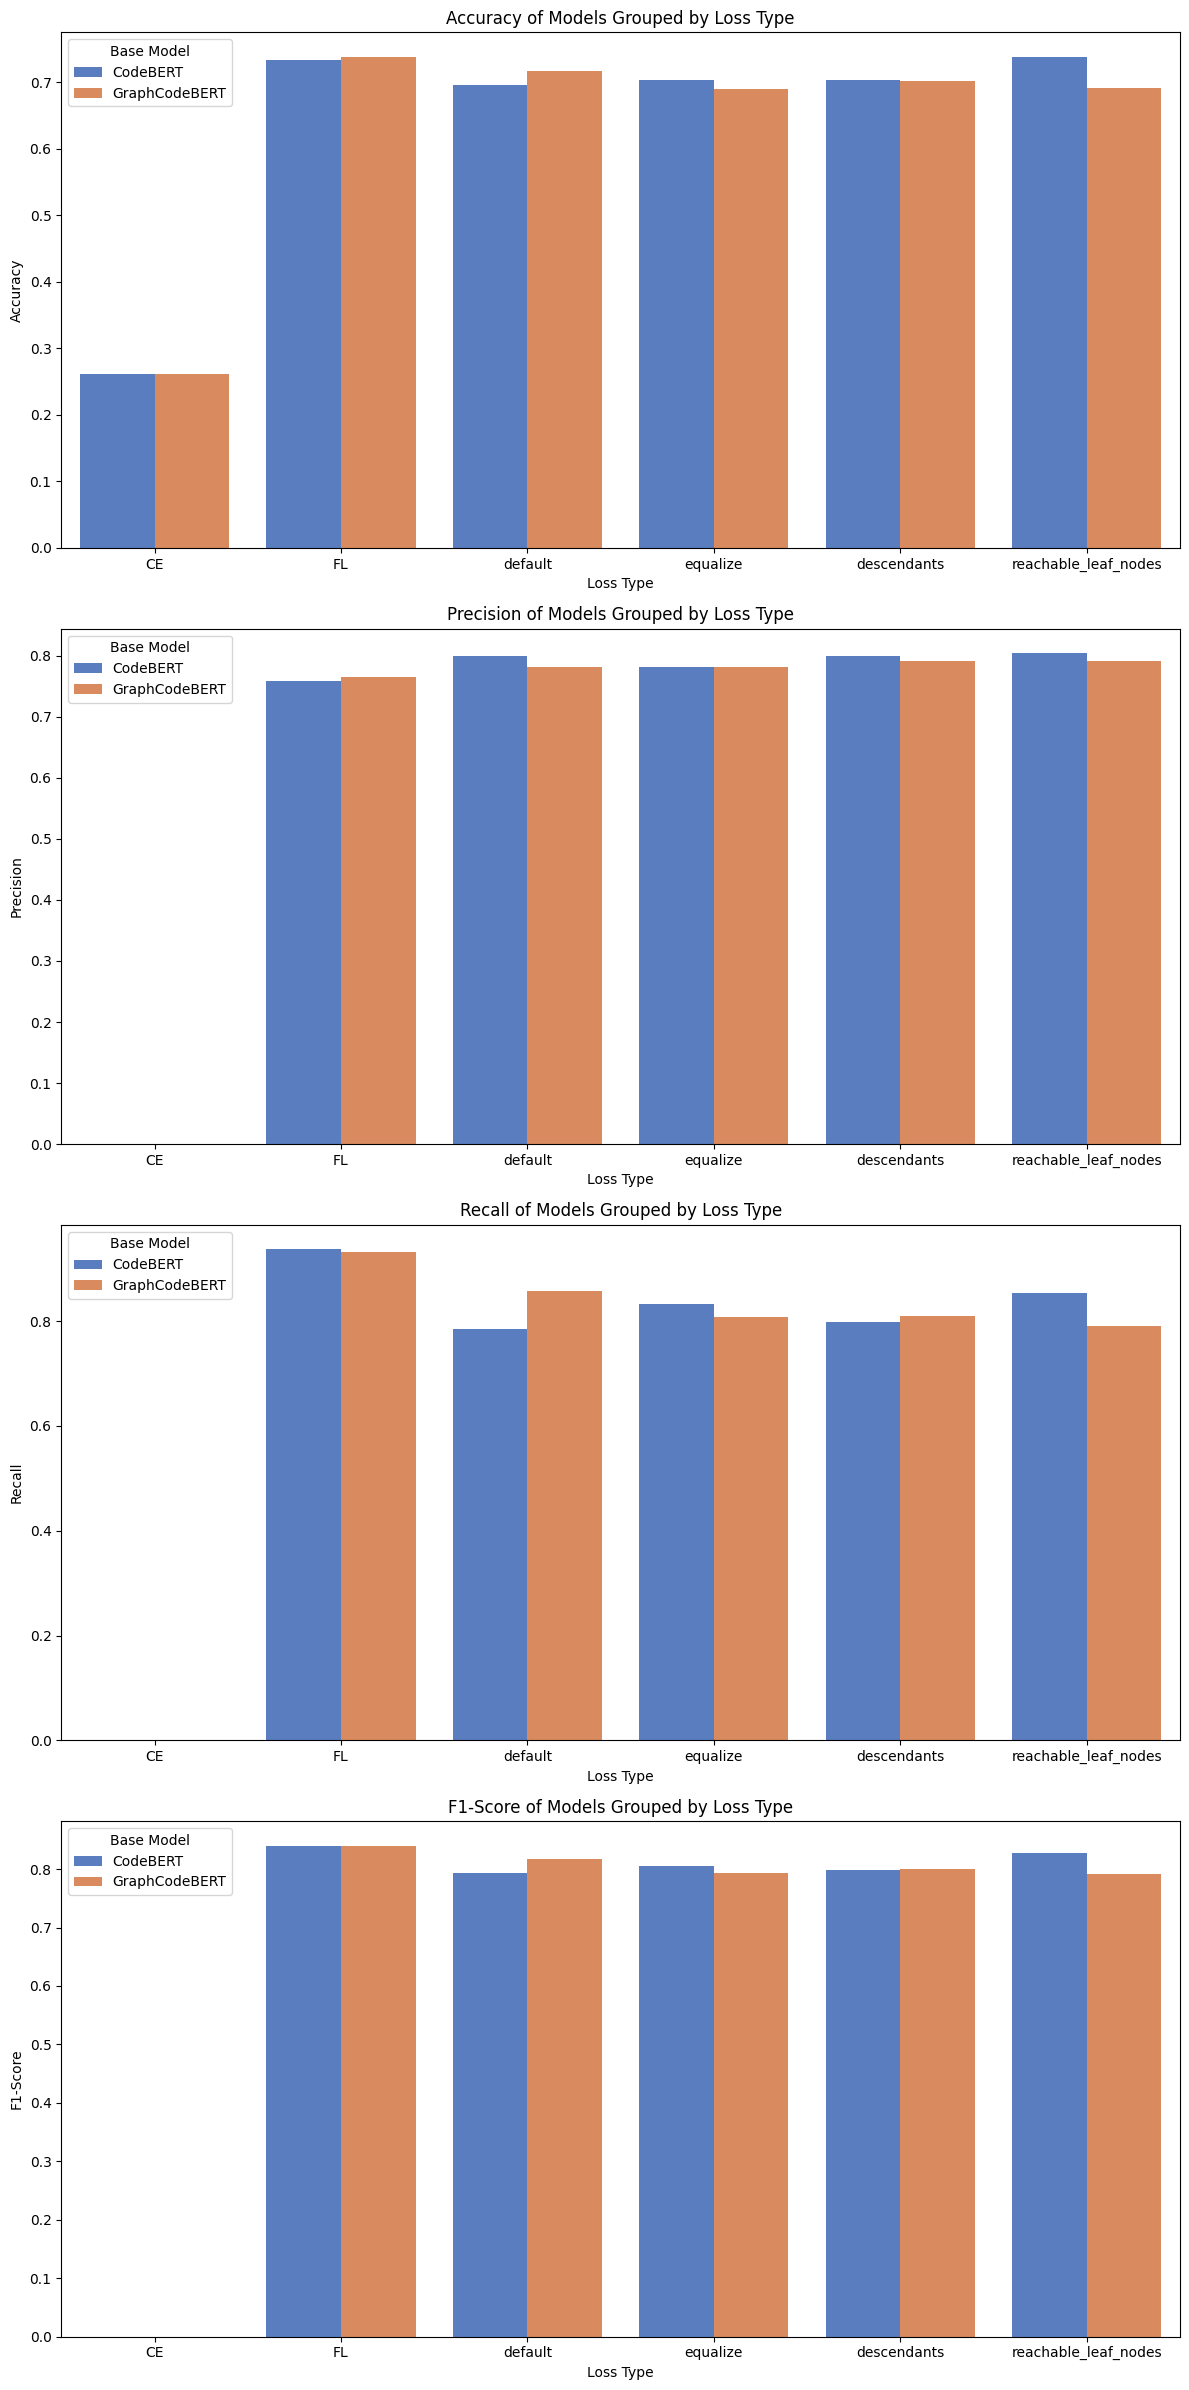

In [8]:
# Setting up the plot dimensions and layout
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))

# List of outcome measures
outcome_measures = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting each outcome measure in a separate subplot
for i, measure in enumerate(outcome_measures):
    sns.barplot(ax=axes[i], x='Loss', y=measure, hue='BaseModel', data=df, palette='muted')
    axes[i].set_title(f'{measure} of Models Grouped by Loss Type')
    axes[i].set_xlabel('Loss Type')
    axes[i].set_ylabel(measure)
    axes[i].legend(title='Base Model')

plt.tight_layout()
# Define the filename for the combined plot
combined_plot_filename = "figures/binary_model_performance_plots.png"

# Save the entire figure as a single PNG file
plt.savefig(combined_plot_filename, bbox_inches='tight')
plt.show()

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.drawing.nx_agraph import graphviz_layout

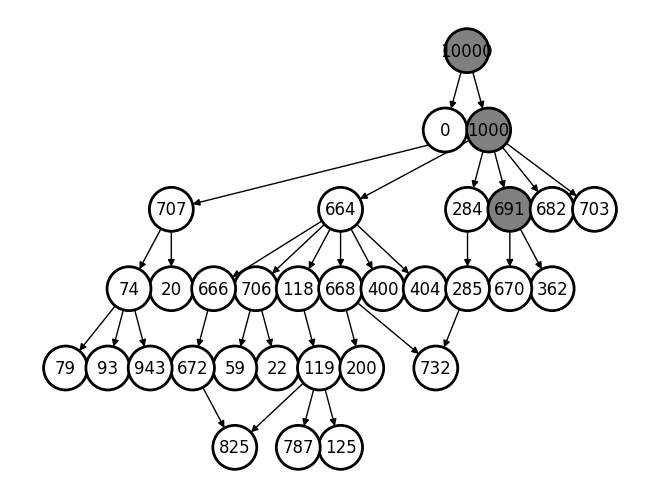

IndexError: list assignment index out of range

<Figure size 640x480 with 0 Axes>

In [13]:

def get_parents(G, node):
    return list(G.predecessors(node))
def get_ancestors(G, node):
    return list(nx.ancestors(G, node))
def get_children(G, node):
    return list(G.successors(node))

def get_siblings(G, node):
    parents = get_parents(G, node)
    siblings = set()
    for parent in parents:
        siblings.update(G.successors(parent))
    siblings.discard(node)
    return list(siblings)

def color_ancestors_recursively(G, node, specific_node, color_map):
    if node == specific_node:
        return
    
    # Color the current node gray
    color_map[node] = 'gray'
    
    # Recursively color ancestors gray
    for parent in G.predecessors(node):
        color_ancestors_recursively(G, parent, specific_node, color_map)


def plot_dag(G, specific_node, mode):
    color_map = []
    for node in G:
        # Encoding
        if mode == 1: 
            file_name = 'Encoding'
            if node == specific_node or node in get_ancestors(G, specific_node):
                color_map.append('gray')
            else:
                color_map.append('white')
        

    pos = graphviz_layout(G, prog='dot') 
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1000, edgecolors='black', linewidths=2)
    plt.show()
    plt.savefig(f"figures/{file_name}.png")
   
    
def create_graph_from_json(paths_file, max_depth=None):
    with open(paths_file, 'r') as f:
        paths_dict_data = json.load(f)
        
    G = nx.DiGraph()

    def add_path_to_graph(path):
        nodes = list(map(int, path.split('-')))
        if max_depth:
            max_level = min(max_depth, len(nodes) - 1)
            for i in range(max_level):
                G.add_edge(nodes[i], nodes[i+1])
        else:
            for i in range(len(nodes) - 1):
                G.add_edge(nodes[i], nodes[i+1])

    # Add edges from the paths in the JSON data
    for key, paths_list in paths_dict_data.items():
        for path in paths_list:
            add_path_to_graph(path)
            
    return G

# Example usage
paths_file = 'data_preprocessing/preprocessed_datasets/debug_datasets/graph_assignedcwe_paths.json'
fig_title = "Directed Acyclic Graph for CWE Hierarchy after CWE Reassignment"
file_name = "reassigned_cwe_DAG"
G = create_graph_from_json(paths_file)

specific_node = 691  # Replace with your specific node

# Plot 1
plot_dag(G, specific_node, mode=1)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def color_ancestors_and_descendants(G, specific_node):
    color_map = {node: 'white' for node in G.nodes()}
    
    # Initialize the queue with the specific node
    queue = [specific_node]
    
    while queue:
        current_node = queue.pop(0)
        if color_map[current_node] == 'gray':
            continue  # Skip already processed nodes
        
        # Color the current node gray
        color_map[current_node] = 'gray'
        
        # Add ancestors and ancestor siblings to the queue
        parents = list(G.predecessors(current_node))
        for parent in parents:
            color_map[parent] = 'gray'  # Color ancestor gray
            siblings = list(G.successors(parent))
            for sibling in siblings:
                color_map[sibling] = 'gray'  # Color ancestor sibling gray
                queue.append(sibling)
        
        # Add children and siblings of the current node to the queue
        children = list(G.successors(current_node))
        for child in children:
            color_map[child] = 'gray'  # Color child gray
            queue.append(child)
        
        # Check if the current_node is in the siblings list before removing it
        if current_node in siblings:
            siblings.remove(current_node)  # Remove the current node from siblings
            for sibling in siblings:
                color_map[sibling] = 'gray'  # Color sibling gray
    
    return color_map

specific_node = 1

color_map = color_ancestors_and_descendants(G, specific_node)

# Visualize the graph with node colors
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[color_map[node] for node in G.nodes()], cmap=plt.cm.gray)
plt.show()
